In [12]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [45]:
with sqlite3.connect('news.db') as conn:
    df = pd.read_sql("SELECT * from news_stories", conn)

In [46]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.drop('id', axis=1, inplace=True)
df.sort_index(inplace=True)

,text,author
date,,
2024-08-30,Two men who repeatedly punched and kicked anot...,newsteam
2024-08-31,A couple's special day could have been a disas...,
2024-08-30,The Government is working to ensure that local...,christiebailey
2024-08-31,Islanders are being invited to meet and engage...,newsteam
2024-08-31,A fundraising festival including traditional A...,kellyfrost
...,...,...
2024-05-30,"An ""innovative"" project to install holiday pod...",jamesjeune
2024-05-31,Some children are experimenting with drugs and...,jodieyettram
2024-05-30,An inquest into the death of a 52-year-old tre...,newsteam


In [65]:
df['author'] = (
    df['author'].str
    .replace('weekendeditor', '')
    .replace('seniorreporter', '')
    .replace('copy', '')
)

In [66]:
df['word_count'] = df['text'].str.split().apply(len)

Text(0.5, 0, 'Total Words')

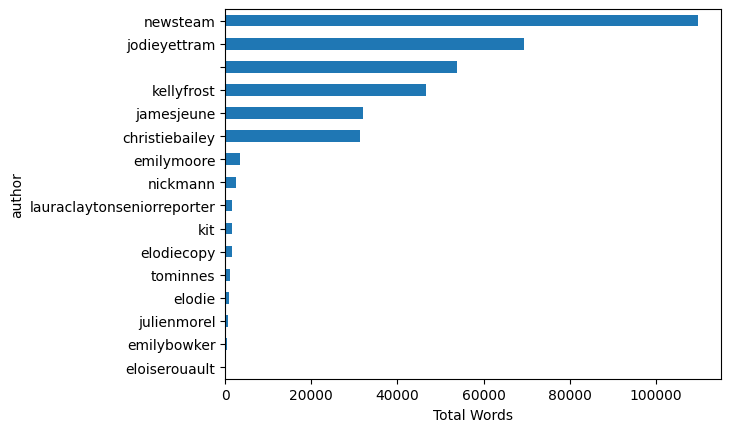

In [70]:
df.groupby('author')['word_count'].sum().sort_values().plot(kind='barh')
plt.xlabel('Total Words')